# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 300 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = 'ff9ecf13203e7ef3adc668aac386041c'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

# Answer
At first the blobs are made for evaluation

In [4]:
import sys
sys.path.append('mglearn')
import make_blobs

X, y = make_blobs.make_blobs(centers=2, n_samples=1000, random_state=0)

To evaluate the performances of the different kernels, at first a 10-fold cross validation is done. the scores taken were the AUC scores. Out of this cross validation scores are retrieved and the average of these scores is given for the linear (0.99364), polynomial (0.99288) and radial basis function (0.97680) kernels. These scores are quite close to each other, with the linear kernel having a very slight edge over the others.

In [5]:
# Print average scores

from sklearn import svm
from sklearn.model_selection import cross_val_score

avg_score = []

for kernel_type in ['linear', 'poly', 'rbf']:
   cross_score = cross_val_score(svm.SVC(kernel=kernel_type),X,y, cv=10, scoring='roc_auc')
   avg_score.append(sum(cross_score)/len(cross_score))

print(avg_score)

[0.99363999999999986, 0.99287999999999987, 0.97680000000000011]


The following figures show how the blobs are divided by the svm classifier. The differences between the linear and the  polynomial kernel is minimal, as the best classification between the two sets seems to be almost linear. This was also seen in the score averages. The RBF kernel is treats the classifcation less-linearly and would perform better in highly non classifications, but this is not the case for this example. Therefore it performs worse

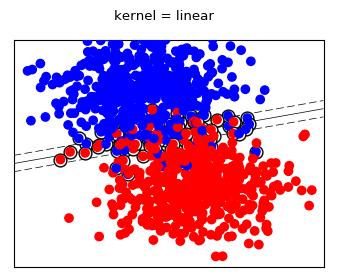

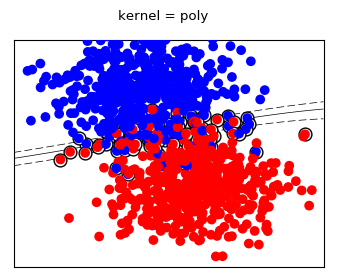

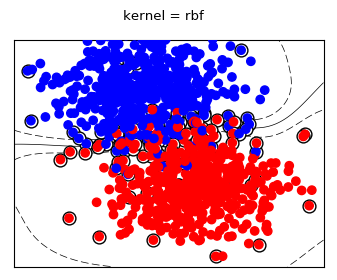

In [8]:
# Show figures

from sklearn import svm

# figure number
fignum = 1

for kernel in ('linear', 'poly', 'rbf'):
        clf = svm.SVC(kernel=kernel)
        _ = clf.fit(X, y)

        # plot the line, the points, and the nearest vectors to the plane
        _ = plt.figure(fignum, figsize=(4, 3))
        _ = plt.suptitle('kernel = %s' % kernel)
        
        _ = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=85, edgecolors='k', c='w', zorder=10)
        _ = plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)

        #for i, coef in enumerate(clf.dual_coef_[0]):
        #    plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

        _ = plt.axis('tight')
        x_min = -2
        x_max = 5
        y_min = -2
        y_max = 6

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        _ = plt.figure(fignum, figsize=(4, 3))
        #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
        _ = plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        _ = plt.xlim(x_min, x_max)
        _ =  plt.ylim(y_min, y_max)

        _ =  plt.xticks(())
        _ =  plt.yticks(())
        fignum = fignum + 1

plt.show()

In the next cell the svm classifier with the rbf kernel is evaluated with a very low, medium and very high C and gamma value and all of these are plotted. Also the number of support vectors is printed. When C is 2^-15 and when gamma is 2^15, there were 1000 support vectors. This is a clear case of overfitting, as can be seen in the plots as well. On the other hand, the combination of C = 1 and gamma = 2^-15, there is some underfitting, as the classification border in the picture is placed in a very basic way. (just a line)

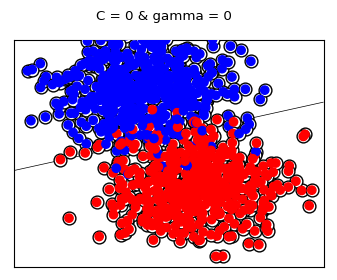

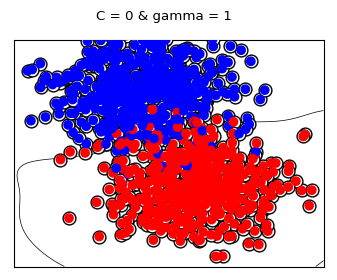

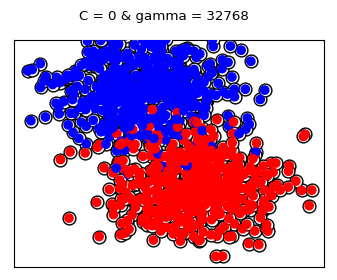

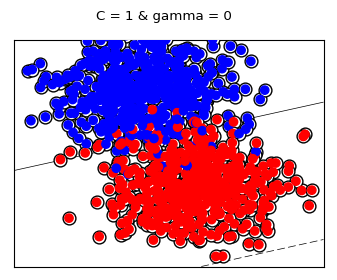

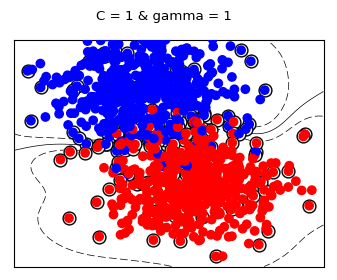

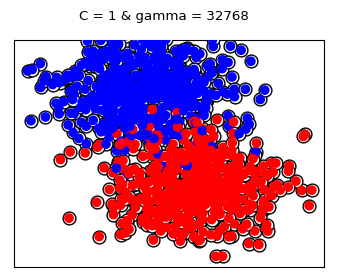

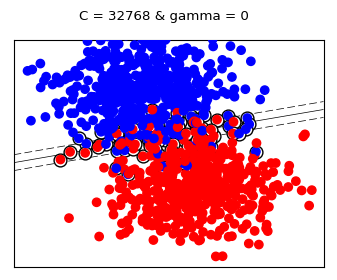

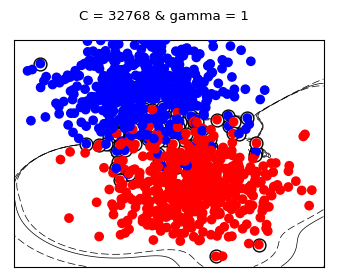

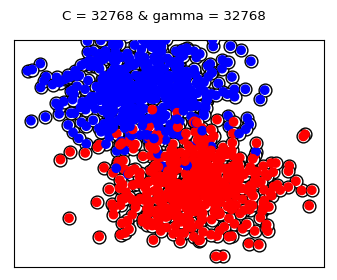

[[ 1000.  1000.  1000.]
 [ 1000.   160.  1000.]
 [  106.   105.  1000.]]
[[ 0.993  0.986  1.   ]
 [ 0.993  0.981  1.   ]
 [ 0.993  0.996  1.   ]]


In [9]:
from sklearn.metrics import roc_auc_score


n_sup_vec = np.zeros((3,3))
auc_scores = np.zeros((3,3))
fignum = 1

i_C = 0

for C in [2 ** -15, 1, 2 ** 15]:
    i_gamma = 0
    for gamma in [2 ** -15, 1, 2 ** 15]:
        clf = svm.SVC(kernel='rbf', C = C, gamma = gamma)
        _ = clf.fit(X, y)

        # plot the line, the points, and the nearest vectors to the plane
        _ = plt.figure(fignum, figsize=(4, 3))
        _ = plt.suptitle('C = %d & gamma = %d' % (C, gamma))

        _ = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=85, edgecolors='k', c='w', zorder=10)
        _ = plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)
        
        sup_vectors = len(clf.support_vectors_[:,0])
        auc = roc_auc_score(y, clf.decision_function(X))
        
        n_sup_vec[i_C,i_gamma] = sup_vectors
        auc_scores[i_C, i_gamma] = auc
        
        
        #for i, coef in enumerate(clf.dual_coef_[0]):
        #    plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

        _ = plt.axis('tight')
        x_min = -2
        x_max = 5
        y_min = -2
        y_max = 6

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        _ = plt.figure(fignum, figsize=(4, 3))
        #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.bwr, alpha=0.1)
        _ = plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        _ = plt.xlim(x_min, x_max)
        _ = plt.ylim(y_min, y_max)

        _ = plt.xticks(())
        _ = plt.yticks(())
        fignum  += 1
        
        i_gamma += 1
    
    i_C += 1

plt.show()
print(n_sup_vec)
print(auc_scores)
        

In the next cell a 20x20 heat map is made. To make this heatmap, first a grid search is done for 20 values for both gamma and C with 20 values on a 2-log range between 2^-15 and 2^15. In the end, the heatmap is a bit unclear due to the vast amount of values that are overlapping. However, the colours in the heatmap are clear and show that the gamma value is most important for the score. When gamma has a value about over 10^2, the score drops firmly. Under 10^2 the score is higher than 0.9 and at a gamma in the range of 10^4 the score is even dropped down to 0.5. C has a smaller impact ot the score. There is some impact though, as the score drops at a lower gamma when C is lower than 1.

In the last part of this exercise, the algorithm seemed to overfit with a low C and a high gamma. The heat map seems to show that as well, as in those cases the verification shows a low score, due to severe overfitting. Since the classification of this distribution can be done efficiently in a very basic way (as the first part of the exercise showed that a linear kernel showed a very good classification), underfitting would not show a very bad score. Therefore underfitting is not really seen in the heatmap.

In [10]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
import pandas as pd

log_range = np.logspace(start = -15, stop = 15, base = 2, num = 20)

param_grid = {'C': log_range,
              'gamma': log_range}

grid_search = GridSearchCV(SVC(), param_grid, cv=10)
_ = grid_search.fit(X, y)

# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,...,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.02,1.75e-03,0.95,0.96,...,5.52e-04,5.12e-04,0.02,2.11e-03
1,0.02,1.70e-03,0.95,0.96,...,2.02e-04,2.44e-04,0.02,2.11e-03
2,0.02,1.60e-03,0.95,0.96,...,2.27e-04,2.00e-04,0.02,2.11e-03
3,0.03,2.75e-03,0.95,0.96,...,1.06e-02,1.45e-03,0.02,1.94e-03
4,0.03,3.70e-03,0.95,0.95,...,1.39e-02,3.22e-03,0.02,1.87e-03


[[ 0.955  0.955  0.955  0.955  0.955  0.954  0.954  0.954  0.954  0.954
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.954  0.954  0.954  0.954  0.954
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.954  0.954  0.954  0.954  0.954
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.954  0.954  0.954  0.954  0.954
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.954  0.954  0.954  0.954  0.954
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.954  0.955  0.954  0.954  0.955
   0.952  0.951  0.935  0.911  0.836  0.77   0.58   0.541  0.529  0.508]
 [ 0.955  0.955  0.955  0.955  0.955  0.956  0.955  0.954  0.954  0.954
   0.954  0.951  0.935  0.911  0.836  0.77   0.58   0.541 

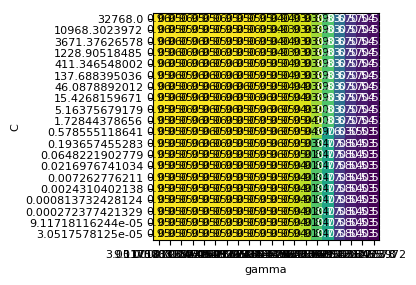

In [11]:
scores = np.array(results.mean_test_score).reshape(20, 20)
print(scores)
# plot the mean cross-validation scores
heatmap = mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");

heatmap

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for Accuracy with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and Accuracy performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the **whole** dataset to obtain a clean evaluation. What is the mean optimized performance? Is this in line with the optimized result of the random search of the previous question?
- Train an SVM using the optimal hyperparameter configuration you found (in part 1 of this question) and test it on the held out (20%) test set. Compare this Accuracy result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [12]:
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute); 

print(X)
print(y)

[[ 0.438  0.498  3.625 ...,  0.444  0.44   0.429]
 [ 0.438  0.498  3.625 ...,  0.444  0.443  0.429]
 [ 0.438  0.498  3.625 ...,  0.444  0.446  0.429]
 ..., 
 [ 0.937  5.     4.034 ...,  5.     5.     1.105]
 [ 0.945  4.052  4.052 ...,  5.     5.     1.118]
 [ 0.95   4.066  5.    ...,  5.     5.     1.168]]
[3 3 3 ..., 1 0 1]


<h4> Answer</h4>

At first the data is made into a stratified 80-20 split. Then the svm hyperparameters are optimized for the best accuracy possible with a random search. This is done by doing the randomized search for all three different kernels and then randomly choosing different values for the hyper parameter. The best results seemed to come from the Polynomial kernel with test accuracies of almost 1. The other parameters from the random search off course could differ, but should not be far from the C of arround 0.8 and a degree of 3

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import expon
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = None)

log_range = np.logspace(start = -15, stop = 15, base = 2, num = 20)

best_random_search = 0

param_grid = [{'kernel': ['rbf'], 'C': expon(), 'gamma': expon()}, {'kernel': ['linear'], 'C': expon()}, {'kernel': ['poly'], 'C': expon(), 'degree' : list(range(2,11))}]

for i in range(len(param_grid)):
    random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid[i],
                                   n_iter=40, scoring = "accuracy")
    _ = random_search.fit(X_train, y_train)

    print(random_search.best_params_)
    print("Accuracy on training set: {:.2f}".format(random_search.score(X_train, y_train)))
    
    if i == 0:
        best_random_search = random_search
    elif random_search.score(X_train, y_train) > best_random_search.score(X_train, y_train):
        best_random_search = random_search

print(str(best_random_search.best_params_))
print("Accuracy on training set: {:.2f}".format(best_random_search.score(X_train, y_train)))


{'C': 4.9894700241118199, 'gamma': 0.090955331052090971, 'kernel': 'rbf'}
Accuracy on training set: 0.98
{'C': 2.2777320592731938, 'kernel': 'linear'}
Accuracy on training set: 0.74
{'degree': 3, 'C': 1.2895696716963911, 'kernel': 'poly'}
Accuracy on training set: 0.98
{'degree': 3, 'C': 1.2895696716963911, 'kernel': 'poly'}
Accuracy on training set: 0.98


Next a 5x3 nested cross validation is done. A nested cross validation means that first the data set is split in training and test data, and then the data is split in training and validation data. The independent test set shows a lower accuracy than the randomized search. This is to be expected as in the randomized search there is only one test and is selected for its high accuracy on that test. It could be a lucky guess, whereas when it is evaluated ten times, it is less likely for all ten to be a lucky guess.

In [16]:
from sklearn.model_selection import cross_val_score

best_scores = [0]

for i in range(len(param_grid)):
    scores = cross_val_score(RandomizedSearchCV(SVC(), param_grid[i], cv=3), X_train, y_train, cv=10, scoring = "accuracy")
    
    print("Cross-validation accuracies: ", scores)
    print("Mean cross-validation accuracy: ", scores.mean())
    
    if np.asarray(best_scores).mean() < scores.mean():
        best_scores = scores

Cross-validation accuracies:  [ 0.872  0.872  0.911  0.901  0.899  0.826  0.83   0.867  0.867  0.855]
Mean cross-validation accuracy:  0.870048471743
Cross-validation accuracies:  [ 0.74   0.694  0.699  0.741  0.722  0.743  0.759  0.734  0.701  0.715]
Mean cross-validation accuracy:  0.724805332975
Cross-validation accuracies:  [ 0.932  0.877  0.916  0.901  0.904  0.929  0.881  0.931  0.901  0.906]
Mean cross-validation accuracy:  0.907651240359


At last an svm is trained with the optimal parameters. This is then trained with the original training data and tested with the test data.

In [20]:
svm = SVC(kernel = 'poly', degree = 3, C = 0.8)
svm.fit(X_train, y_train)
test_scores = svm.score(X_test, y_test)
best_scores, test_scores
print("The score of the nested CV is %.02f and when using test data %.02f" %(np.mean(best_scores), test_scores))

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(array([ 0.932,  0.877,  0.916,  0.901,  0.904,  0.929,  0.881,  0.931,
         0.901,  0.906]), 0.9285714285714286)

The score of the nested CV is 0.91 and when using test data 0.93


## A benchmark study (3 points (2+1))

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 470, 1120, 1464 and 1471. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models. Also remove any row identifiers (see, e.g., https://www.openml.org/d/1120)
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.
* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (explore at least 5 values per hyperparameter, where possible). Does this affect the ranking of the algorithms?

In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
datasets = []
datasets.append(oml.datasets.get_dataset(37))
datasets.append(oml.datasets.get_dataset(470))
datasets.append(oml.datasets.get_dataset(1120))
datasets.append(oml.datasets.get_dataset(1464))
datasets.append(oml.datasets.get_dataset(1471))
dataset_frames = [] 


In [22]:
from sklearn.preprocessing import OneHotEncoder
results = []
for dataset in datasets:
    imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
    pipe = Pipeline([('preprocessing',Imputer()),('classifier',RandomForestClassifier())])
    X,y,cat_ind = dataset.get_data(target=dataset.default_target_attribute,return_categorical_indicator=True)
    _ = imp.fit(X)
    X = imp.transform(X)
    enc = OneHotEncoder(categorical_features=cat_ind,sparse=False)
    _ = enc.fit(X)
    X = enc.transform(X)
    param_grid = [{'classifier':[RandomForestClassifier()],'preprocessing':[StandardScaler(),MinMaxScaler(),None],},
                 {'classifier':[KNeighborsClassifier()],'preprocessing':[StandardScaler(),MinMaxScaler(),None]},
                 {'classifier':[SVC()],'preprocessing':[StandardScaler(),MinMaxScaler(),None]}]
    grid = GridSearchCV(pipe,param_grid,cv=10,scoring='roc_auc')
    _ = grid.fit(X,y)
    temp_df = pd.DataFrame(grid.cv_results_)[['mean_test_score','param_preprocessing','param_classifier']]
    temp_df['Dataset'] = dataset.name
    results.append(temp_df)
    
final = pd.concat(results)    
final

,mean_test_score,param_preprocessing,param_classifier,Dataset
0,0.80,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
1,0.80,"MinMaxScaler(copy=True, feature_range=(0, 1))","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
2,0.80,None,"(DecisionTreeClassifier(class_weight=None, cri...",diabetes
3,0.78,"StandardScaler(copy=True, with_mean=True, with...","KNeighborsClassifier(algorithm='auto', leaf_si...",diabetes
4,0.78,"MinMaxScaler(copy=True, feature_range=(0, 1))","KNeighborsClassifier(algorithm='auto', leaf_si...",diabetes
5,0.75,None,"KNeighborsClassifier(algorithm='auto', leaf_si...",diabetes
6,0.83,"StandardScaler(copy=True, with_mean=True, with...","SVC(C=1.0, cache_size=200, class_weight=None, ...",diabetes
7,0.83,"MinMaxScaler(copy=True, feature_range=(0, 1))","SVC(C=1.0, cache_size=200, class_weight=None, ...",diabetes
8,0.65,None,"SVC(C=1.0, cache_size=200, class_weight=None, ...",diabetes
0,0.63,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",profb


the performance for the classifiers differs greatly for the datasets, but even within the dataset we see the preprocessing is important aswell.

taking the maximum score, thus depending on preprocessing and then averaging these we get:

RandomForest - 0.688   
SVC          - 0.756  
KNN          - 0.664  

The average for SVC is the highest but the performance was heavily dependant on the preprocessing for example on the first dataset with the Standardscaler performance was 0.83 whilst performance without preprocessing was 0.65. this effect was present accross all datasets. Thus in the comparison SVC performns well when preprocessing is done with the standard settings. However without preprocessing and the standard settings the randomforest would be performing the best.


In [67]:
from sklearn.preprocessing import OneHotEncoder
results = []
for dataset in datasets:
    print(dataset.name)
    imp = Imputer(missing_values='NaN',strategy='mean',axis=0)
    pipe = Pipeline([('preprocessing',Imputer()),('classifier',RandomForestClassifier())])
    X,y,cat_ind = dataset.get_data(target=dataset.default_target_attribute,return_categorical_indicator=True)
    _ = imp.fit(X)
    X = imp.transform(X)
    enc = OneHotEncoder(categorical_features=cat_ind,sparse=False)
    _ = enc.fit(X)
    X = enc.transform(X)
    print("finished transform")
    param_grid = [{'classifier':[RandomForestClassifier()],'preprocessing':[StandardScaler(),MinMaxScaler(),None],
                   'classifier__n_estimators':[4,8,10,16,32],'classifier__max_features':[0.01,0.05,0.25,None,'auto']},
                 {'classifier':[KNeighborsClassifier()],'preprocessing':[StandardScaler(),MinMaxScaler(),None],
                  'classifier__n_neighbors':[1,2,3,4,5]},
                 {'classifier':[SVC()],'preprocessing':[StandardScaler(),MinMaxScaler(),None],'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'classifier__gamma': [0.001, 0.01, 0.1, 100]}]
    grid = GridSearchCV(pipe,param_grid,cv=10,scoring='roc_auc')
    _ = grid.fit(X,y)
    print("done with grid")
    temp_df = pd.DataFrame(grid.cv_results_)[['mean_test_score','param_preprocessing','param_classifier']]
    temp_df['Dataset'] = dataset.name
    results.append(temp_df)
    


final = pd.concat(results)    
final

diabetes


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

OneHotEncoder(categorical_features=[False, False, False, False, False, False, False, False],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

finished transform


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-0...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classifier__max_features': [0.01, 0.05, 0.25, None, 'auto'], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'classifier__n_estimators': [4, 8, 10, 16, 32], 'classifier': [RandomForestClassifier(bootstrap...
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

done with grid
profb


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

OneHotEncoder(categorical_features=[False, False, False, True, True, False, False, True, True],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

finished transform


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-0...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classifier__max_features': [0.01, 0.05, 0.25, None, 'auto'], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'classifier__n_estimators': [4, 8, 10, 16, 32], 'classifier': [RandomForestClassifier(bootstrap...
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

done with grid
MagicTelescope


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

OneHotEncoder(categorical_features=[False, False, False, False, False, False, False, False, False, False],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

finished transform


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-0...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classifier__max_features': [0.01, 0.05, 0.25, None, 'auto'], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'classifier__n_estimators': [4, 8, 10, 16, 32], 'classifier': [RandomForestClassifier(bootstrap...
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

done with grid
blood-transfusion-service-center


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

OneHotEncoder(categorical_features=[False, False, False, False],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

finished transform


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-0...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classifier__max_features': [0.01, 0.05, 0.25, None, 'auto'], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'classifier__n_estimators': [4, 8, 10, 16, 32], 'classifier': [RandomForestClassifier(bootstrap...
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

done with grid
eeg-eye-state


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

OneHotEncoder(categorical_features=[False, False, False, False, False, False, False, False, False, False, False, False, False, False],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values='auto', sparse=False)

finished transform


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('preprocessing', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-0...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classifier__max_features': [0.01, 0.05, 0.25, None, 'auto'], 'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), MinMaxScaler(copy=True, feature_range=(0, 1)), None], 'classifier__n_estimators': [4, 8, 10, 16, 32], 'classifier': [RandomForestClassifier(bootstrap...
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

done with grid


,mean_test_score,param_preprocessing,param_classifier,Dataset
0,0.76,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
1,0.72,"MinMaxScaler(copy=True, feature_range=(0, 1))","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
2,0.75,None,"(DecisionTreeClassifier(class_weight=None, cri...",diabetes
3,0.76,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
4,0.78,"MinMaxScaler(copy=True, feature_range=(0, 1))","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
5,0.78,None,"(DecisionTreeClassifier(class_weight=None, cri...",diabetes
6,0.78,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
7,0.78,"MinMaxScaler(copy=True, feature_range=(0, 1))","(DecisionTreeClassifier(class_weight=None, cri...",diabetes
8,0.79,None,"(DecisionTreeClassifier(class_weight=None, cri...",diabetes
9,0.80,"StandardScaler(copy=True, with_mean=True, with...","(DecisionTreeClassifier(class_weight=None, cri...",diabetes


The above code was used to optimize the parameters however during editing etc the dataframe got lost and this code was ran in a different notebook for time optimization purposes. In the cell below we load a CSV, this CSV is the result of the above code.

In [68]:
data = pd.read_csv(r'C:/Users/timothy/Documents/GitHub/ML-course/question3.csv', index_col=0, usecols=[0,1,2,3,4])
data

,mean_test_score,param_preprocessing,param_classifier,Dataset
index,,,,
0,0.81,"StandardScaler(copy=True, with_mean=True, with...","RandomForestClassifier(bootstrap=True, class_w...",diabetes
1,0.81,NaN,"RandomForestClassifier(bootstrap=True, class_w...",diabetes
2,0.81,"StandardScaler(copy=True, with_mean=True, with...","RandomForestClassifier(bootstrap=True, class_w...",diabetes
3,0.81,NaN,"RandomForestClassifier(bootstrap=True, class_w...",diabetes
4,0.81,"StandardScaler(copy=True, with_mean=True, with...","RandomForestClassifier(bootstrap=True, class_w...",diabetes
5,0.82,NaN,"RandomForestClassifier(bootstrap=True, class_w...",diabetes
6,0.81,"StandardScaler(copy=True, with_mean=True, with...","RandomForestClassifier(bootstrap=True, class_w...",diabetes
7,0.81,NaN,"RandomForestClassifier(bootstrap=True, class_w...",diabetes
8,0.80,"StandardScaler(copy=True, with_mean=True, with...","RandomForestClassifier(bootstrap=True, class_w...",diabetes


After looping over the shown parameters again the maximum result was taken for each dataset to then get an average.

Randomforest - 0.799  
SVC          - 0.811  
KNN          - 0.763  

The ordering did not change, however the range within the datasets ofcourse increased both depending on preprocessing and the parameters. It would have been better to test more parameters but the runtime of the above code was already high. for all three optimizing the parameters makes obvious sense the average performance is greatly increased.


## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

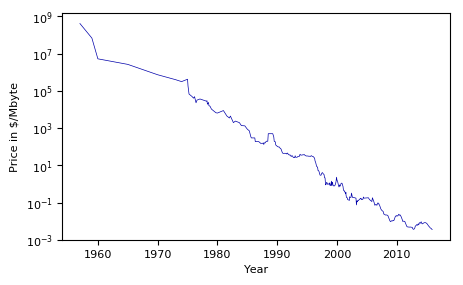

In [36]:
ram_prices = pd.read_csv('data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

<h4>Answer</h4>

To find the best regression variable, first the data has to be preprocessed in the training and test data. Then the different types of regression are tested to find the best performance

In [37]:
X = np.asarray(ram_prices.date.tolist()).reshape(-1,1)
y = np.log(np.asarray(ram_prices.price.tolist()))/np.log(10)

train = ram_prices[ram_prices.date < 2000]
test = ram_prices[ram_prices.date >= 2000]

X_train = np.asarray(train.date.tolist()).reshape(-1,1)
y_train = np.log(np.asarray(train.price.tolist()))/np.log(10)
X_test = np.asarray(test.date.tolist()).reshape(-1,1)
y_test = np.log(np.asarray(test.price.tolist()))/np.log(10)

At first linear regression is used. Linear Regression showed a performance of R^2 = 0.83.

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
_ = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

lr_y = lr.predict(X)

0.83031736295068426

Secondly a decision tree is made. The performance of the test set is R^2 = 50.768251705745726. This is a much smaller error

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
_ = dt.fit(X_train, y_train)
dt.score(X_test, y_test)

dt_y = dt.predict(X)

-5.2297123518253406

Thirdly a random forest regression is used. The performance of the test set for random forest regression is R^2 = 50.768251705745726. Again, this is a better error than the previous ones.

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
_ = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

rf_y = rf.predict(X)

-4.9395133936480864

With the performances calculated and the prices predicted, the different algorithms can be compared. The random forest regression has the best performance, followed by decision tree. Linear regression is easily the worst of the three.
In the plot it can be seen that all three of these do not predict the test date properly.

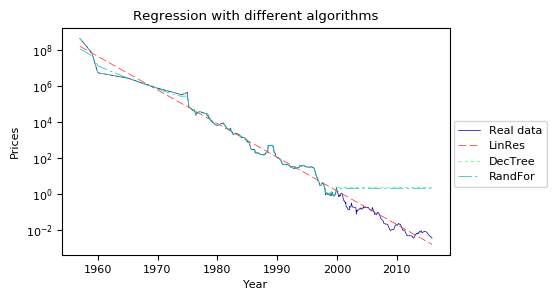

In [44]:
import matplotlib.pyplot as plt

real_plot = plt.plot(X, 10 ** y , X, 10 ** lr_y, X, 10 ** dt_y, X, 10 ** rf_y)
_ =plt.xlabel('Year')
_ =plt.ylabel('Prices')
_ =plt.title('Regression with different algorithms')
_ =plt.legend(['Real data', 'LinRes', 'DecTree', 'RandFor', 'SVR'], loc=(1.01, 0.3))
_ =plt.yscale('log')
plt.show()

For the next part a gaussian process is used to check the performance. To do this every time 5 samples were used to find the regression line and constantly 5 extra samples were added to the training. The Gaussian Process Regressor was made. In this GPR a kernel was chosen. Also, since the data seems to be very noisy, an average error term was taken of 0.5 on the scaled data. What can be seen is that the regression line seems to fit the data better after training with more samples.

[-1.6504982408668138, -1.0874437426058972, 0.68421660177594901, 0.79339632974588792, 0.82565998762991377, 0.88256295806627194, 0.91344005396246342, 0.91328738891653483, 0.87294950306761043]


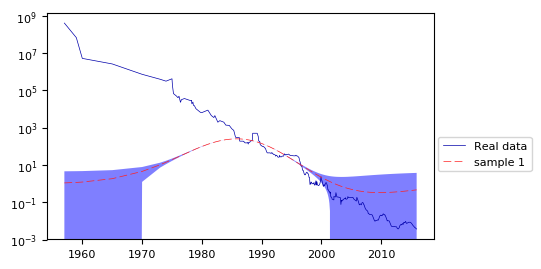

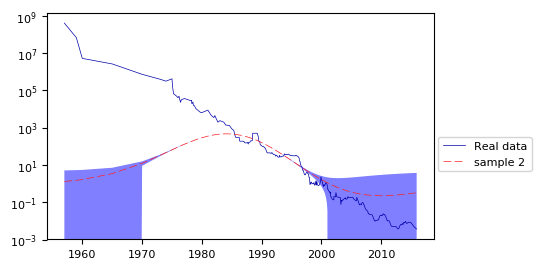

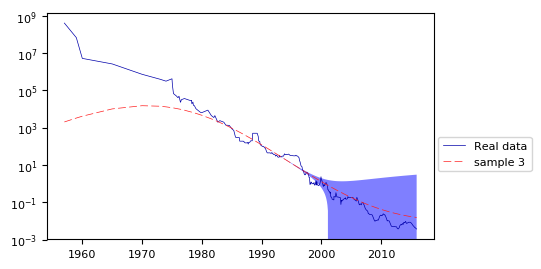

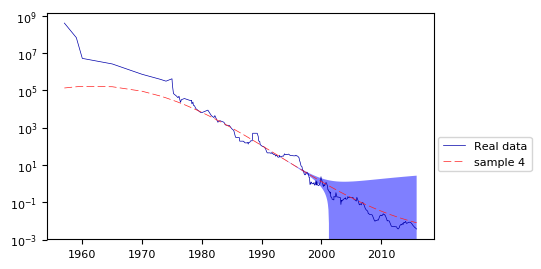

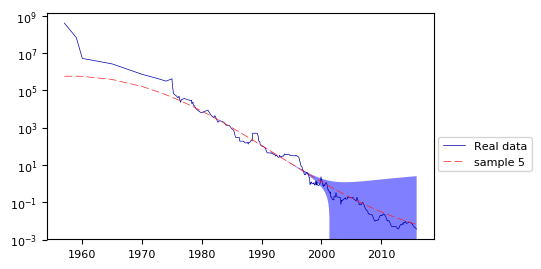

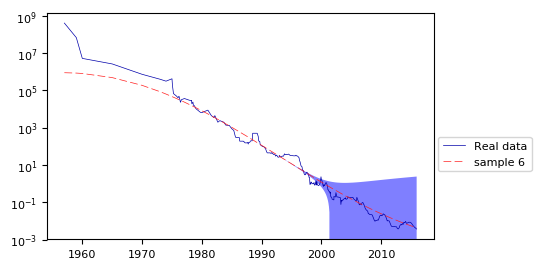

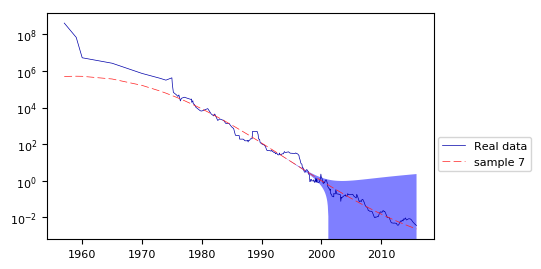

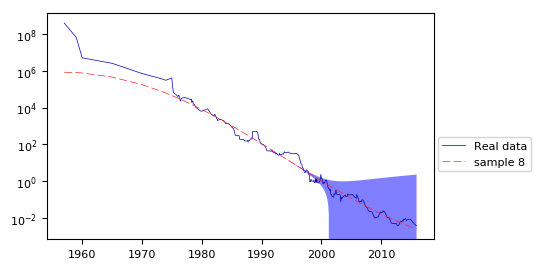

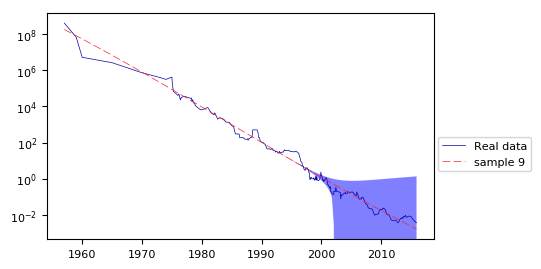

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import random

rand_index = list(range(len(X_train)))
random.shuffle(rand_index)
y_pred = []
score = []

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

for i in range(1,10):
    GPR = GaussianProcessRegressor(kernel = kernel, alpha=0.5, n_restarts_optimizer = 9)   
    
    _ = GPR.fit(X_train[rand_index[0:5*i]], y_train[rand_index[0:5*i]])
    
    y_pred, sigma = GPR.predict(X, return_std = True)
    
    _ = plt.figure();
    _ = plt.plot(X,10 ** y)
    _ = plt.plot(X,10 ** y_pred)
    _ = plt.fill(np.concatenate([X, X[::-1]]),
         np.concatenate([10 ** y_pred - 1.9600 * sigma,
                        (10 ** y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
    _ = plt.legend(['Real data', 'sample %d' % i], loc=(1.01, 0.3))
    _ = plt.yscale('log')
    score.append(GPR.score(X_test, y_test))

print(score)
plt.show()


When using all the training data for the gaussian process regressor, the plot seems to do it very well. However when comparing the score with training with smaller samples of training data, the perfomance of 0.83 was worse than many of the smaller fitting results. This shows that with using to many training samples overfitting might occur

0.82919004946220654

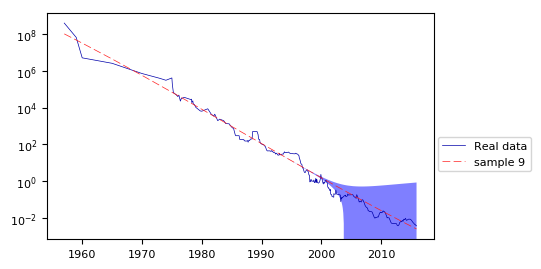

In [46]:
GPR = GaussianProcessRegressor(kernel = kernel, alpha=0.5, n_restarts_optimizer = 9)   
    
_ = GPR.fit(X_train, y_train)
y_pred, sigma = GPR.predict(X, return_std = True)
    
_ = plt.figure();
_ = plt.plot(X,10 ** y)
_ = plt.plot(X,10 ** y_pred)
_ = plt.fill(np.concatenate([X, X[::-1]]),
     np.concatenate([10 ** y_pred - 1.9600 * sigma,
                        (10 ** y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
_ = plt.legend(['Real data', 'sample %d' % i], loc=(1.01, 0.3))
_ = plt.yscale('log')

GPR.score(X_test, y_test)
plt.show()

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145677: https://www.openml.org/t/145677
    - The dataset description can be found here: https://www.openml.org/d/4134
- A leaderboard is kept of the best models: https://www.openml.org/t/145677#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

<h4>Answer</h4>
First of all the task and dataset was inspected to get a feel of what we were looking at. 
Two things were immediatly of interest, the feature space was enormous and the features were normalized/scaled.
The big feature space raised a suspicion that randomforest or GradientBoosting would be a good idea since decision trees have no problem dealing with a high amount of features. On top of this the idea was to make use of the scaled values, thus an SVC seemed like an option however SVC seem difficult to train on large scale data sets. On top of this it is expected that the SVC and the randomforest will consider the more important features automatically. the randomforest because of the information gain and the svm because of the support vectors.


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
task = oml.tasks.get_task(145677)
dataset = task.get_dataset()
X,y,cat = X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,return_categorical_indicator=True)
x_train, x_test, y_train,y_test = train_test_split(X,y)
result = []
for i in range(1,10,):
    i = i/10
    clf = GradientBoostingClassifier(learning_rate=i)
    _ = clf.fit(x_train,y_train)
    score = clf.score(x_test,y_test)
    result.append(score)
    
result



[0.79211087420042647,
 0.79530916844349675,
 0.79637526652452029,
 0.77611940298507465,
 0.77398720682302768,
 0.77505330490405122,
 0.77185501066098083,
 0.74733475479744138,
 0.76119402985074625]

In [70]:

task = oml.tasks.get_task(145677)
clf = GradientBoostingClassifier(learning_rate=0.3)
run = oml.runs.run_task(task, clf)
run.model
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Uploaded to http://www.openml.org/r/1852840


In [80]:
from sklearn.ensemble import RandomForestClassifier
task = oml.tasks.get_task(145677)
clf = RandomForestClassifier(n_jobs=-1,n_estimators=8192,criterion='entropy')
run = oml.runs.run_task(task, clf)
run.model
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8192, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

Uploaded to http://www.openml.org/r/1852591


In [ ]:
task = oml.tasks.get_task(145677)
dataset = task.get_dataset()
X,y,cat = X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,return_categorical_indicator=True)


pipe = Pipeline([('preprocessing', SelectPercentile()), ('classifier', RandomForestClassifier())])

param_grid = [{'classifier':[RandomForestClassifier(criterion='gini',n_jobs=-1)],
               'classifier__max_features':[0.00001,0.001,0.05,0.1,0.15,0.25,None,'auto'],
               'classifier__n_estimators':[256,512,1024,2048],
              'classifier__min_samples_leaf':[1,2,4,8,16,32,64],
              'preprocessing':[None,SelectPercentile()]},
             {'classifier':[RandomForestClassifier(criterion='entropy',n_jobs=-1)],
               'classifier__max_features':[0.00001,0.001,0.05,0.1,0.15,0.25,None,'auto'],
              'classifier__n_estimators':[256,512,1024,2048,4096,8192],
              'classifier__min_samples_leaf':[1,2,4,8,16,32,64],
             'preprocessing':[None,SelectPercentile()]}]

grid = GridSearchCV(pipe,param_grid, cv=5,scoring='roc_auc')
grid.fit(X,y)
grid.best_score_, grid.best_params_

After running the gruid search it became evident that more estimators resulted in better performance. The above code gave was executed several times. The SelectPercentile or none option did not show a real preference some runs selectpercentile was in the best parameters and other times none returned in the best parameters. Similar for gini and entropy there was not a clear winner. However entropy seemed to be returned a once or twice more. 

Thus we have decided to run a pipeline with selectpercentile to see if that would boost the score on the task. Unfortunatly oml produces an error on the pipeline upload. We have tried upgrading, upgrading failed though and due to time constraints we could not locate the problem.

In [5]:
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import Pipeline
from sklearn import ensemble

pipe = Pipeline(steps=[('Preprocessing', SelectPercentile(percentile=5)),
                 ('Classifier', ensemble.RandomForestClassifier(n_jobs=-1,n_estimators=8192,criterion='entropy'))])
task = oml.tasks.get_task(145677)
run = oml.runs.run_task(task, pipe)
run.model
myrun = run.publish()

print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))



Pipeline(steps=[('Preprocessing', SelectPercentile(percentile=5,
         score_func=<function f_classif at 0x00000193C5D690D0>)), ('Classifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            mi...tors=8192, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

KeyError: 'Preprocessing'

In [55]:
from sklearn.svm import SVC
clf2 = SVC(probability=True,C=1,gamma=0.01)
run2 = oml.runs.run_task(task,clf2)
run2.model
run2pub = run2.publish()
print("Uploaded to http://www.openml.org/r/" + str(run2.run_id)) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Uploaded to http://www.openml.org/r/1852831


In [54]:
task = oml.tasks.get_task(145677)
dataset = task.get_dataset()
X,y,cat = X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,return_categorical_indicator=True)


param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
#param_grid = [{'kernel': ['rbf','linear','poly','sigmoid']}]

grid = GridSearchCV(SVC(),param_grid, cv=2,scoring='roc_auc')
grid.fit(X,y)
grid.best_score_, grid.best_params_

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

(0.83442953933394159, {'C': 1, 'gamma': 0.01})